In [11]:
import os

# Define the dataset URL and the paths
dataset_url = "https://bohrium-api.dp.tech/ds-dl/DeePMD-kit-Tutorial-a8z5-v1.zip"
zip_file_name = "DeePMD-kit-Tutorial-a8z5-v1.zip"
dataset_directory = "DeePMD-kit_Tutorial"
home_directory = os.path.expanduser("~")  # Use home directory
local_zip_path = os.path.join(home_directory, zip_file_name)
extract_path = os.path.join(home_directory, "DeePMD-kit_Tutorial")

# Ensure the base directory exists
if not os.path.exists(extract_path):
    os.makedirs(extract_path)
    print(f"Created directory: {extract_path}")

# Check if the dataset directory exists to avoid re-downloading and re-extracting
if not os.path.isdir(os.path.join(extract_path, dataset_directory)):
    # Download the dataset if it doesn't already exist
    if not os.path.isfile(local_zip_path):
        print("Downloading dataset...")
        os.system(f"wget -q -O {local_zip_path} {dataset_url}")
    
    # Extract the dataset
    if os.path.isfile(local_zip_path):
        print("Extracting dataset...")
        os.system(f"unzip -q -n {local_zip_path} -d {extract_path}")
    else:
        raise FileNotFoundError(f"Failed to download the file from {dataset_url}")
else:
    print("Dataset is already downloaded and extracted.")

# Change the current working directory
os.chdir(extract_path)
print(f"Current path is: {os.getcwd()}")


Dataset is already downloaded and extracted.
Current path is: /Users/brian/DeePMD-kit_Tutorial


In [24]:
! tree DeePMD-kit_Tutorial -L 1

DeePMD-kit_Tutorial
├── 00.data
├── 01.train
├── 01.train.finished
├── 02.lmp
└── 02.lmp.finished

6 directories, 0 files


In [25]:
! tree DeePMD-kit_Tutorial/00.data -L 1

DeePMD-kit_Tutorial/00.data
├── abacus_md
├── training_data
└── validation_data

4 directories, 0 files


In [28]:
import dpdata
import numpy as np

# load data of abacus/md format
data = dpdata.LabeledSystem("DeePMD-kit_Tutorial/00.data/abacus_md", fmt="abacus/md")
print("# the data contains %d frames" % len(data))

# random choose 40 index for validation_data
rng = np.random.default_rng()
index_validation = rng.choice(201, size=40, replace=False)

# other indexes are training_data
index_training = list(set(range(201)) - set(index_validation))
data_training = data.sub_system(index_training)
data_validation = data.sub_system(index_validation)

# all training data put into directory:"training_data"
data_training.to_deepmd_npy("DeePMD-kit_Tutorial/00.data/training_data")

# all validation data put into directory:"validation_data"
data_validation.to_deepmd_npy("DeePMD-kit_Tutorial/00.data/validation_data")

print("# the training data contains %d frames" % len(data_training))
print("# the validation data contains %d frames" % len(data_validation))

# the data contains 201 frames
# the training data contains 161 frames
# the validation data contains 40 frames


In [29]:
! tree DeePMD-kit_Tutorial/00.data/ -L 1

DeePMD-kit_Tutorial/00.data/
├── abacus_md
├── training_data
└── validation_data

4 directories, 0 files


In [30]:
! tree DeePMD-kit_Tutorial/00.data/training_data -L 1

DeePMD-kit_Tutorial/00.data/training_data
├── set.000
├── type.raw
└── type_map.raw

2 directories, 2 files


In [31]:
! cat DeePMD-kit_Tutorial/00.data/training_data/type.raw

0
0
0
0
1


In [32]:
! cat DeePMD-kit_Tutorial/00.data/training_data/type_map.raw

H
C


In [33]:
# Check dargs version and Install
!pip show dargs || pip install --upgrade dargs

  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
Using cached typing_extensions-4.12.2-py3-none-any.whl (37 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.9.0
    Uninstalling typing_extensions-4.9.0:
      Successfully uninstalled typing_extensions-4.9.0


In [11]:
# Show input.json
from deepmd.utils.argcheck import gen_args
from dargs.notebook import JSON

with open("./DeePMD-kit_Tutorial/01.train/input.json") as f:
    JSON(f.read(), gen_args())

In [12]:
# ########## Time Warning: 120 secs,C32_CPU ; 13 mins ,C2_CPU ##########
! cd DeePMD-kit_Tutorial/01.train/ && dp train input.json

2025-01-07 15:13:02.633268: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Instructions for updating:
non-resource variables are not supported in the long term
DEEPMD INFO    Calculate neighbor statistics... (add --skip-neighbor-stat to skip this step)
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
DEEPMD INFO    training data with min nbor dist: 1.0459205686110267
DEEPMD INFO    training data with max nbor size: [4 1]
DEEPMD INFO     _____               _____   __  __  _____           _     _  _   
DEEPMD INFO    |  __ \             |  __ \ |  \/  ||  __ \         | |   (_)| |  
DEEPMD INFO    | |  | |  ___   ___ | |__) || \  / || |  

In [1]:
! cd DeePMD-kit_Tutorial/01.train.finished/ && head -n 2 lcurve.out && tail -n 2 lcurve.out

#  step      rmse_val    rmse_trn    rmse_e_val  rmse_e_trn    rmse_f_val  rmse_f_trn         lr
      0      1.79e+01    2.26e+01      1.35e-01    1.33e-01      5.67e-01    7.15e-01    1.0e-03
   9800      3.53e-02    2.64e-02      5.75e-04    3.01e-04      3.46e-02    2.59e-02    4.3e-08
  10000      2.76e-02    2.25e-02      4.83e-04    1.62e-04      2.71e-02    2.21e-02    3.5e-08


In [5]:
!pip install pandas

  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 5.1 MB/s eta 0:00:00a 0:00:01
Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)


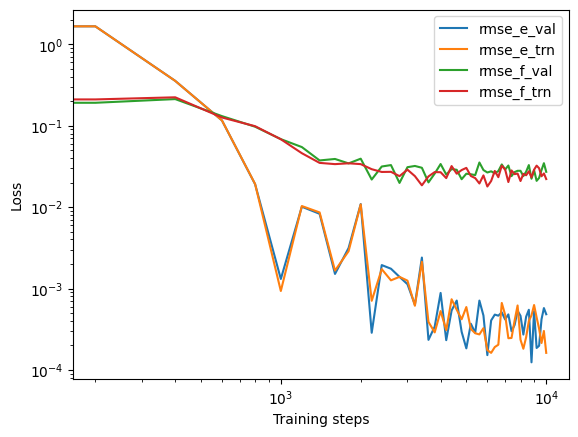

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

with open("./DeePMD-kit_Tutorial/01.train.finished/lcurve.out") as f:
    headers = f.readline().split()[1:]
lcurve = pd.DataFrame(
    np.loadtxt("./DeePMD-kit_Tutorial/01.train.finished/lcurve.out"), columns=headers
)
legends = ["rmse_e_val", "rmse_e_trn", "rmse_f_val", "rmse_f_trn"]
for legend in legends:
    plt.loglog(lcurve["step"], lcurve[legend], label=legend)
plt.legend()
plt.xlabel("Training steps")
plt.ylabel("Loss")
plt.show()

In [7]:
## Navigate to the DeePMD-kit_Tutorial/01.train/ Directory to Freeze the Model
! cd DeePMD-kit_Tutorial/01.train.finished/ && dp freeze -o graph.pb

2025-01-14 12:30:44.043106: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Instructions for updating:
non-resource variables are not supported in the long term
DEEPMD INFO    The following nodes will be frozen: ['o_force', 'o_atom_energy', 'o_energy', 'o_atom_virial', 'model_attr/tmap', 'model_type', 'train_attr/min_nbor_dist', 'fitting_attr/dfparam', 'descrpt_attr/rcut', 'train_attr/training_script', 't_mesh', 'o_virial', 'fitting_attr/daparam', 'model_attr/model_type', 'descrpt_attr/ntypes', 'model_attr/model_version']
Instructions for updating:
This API was designed for TensorFlow v1. See https://www.tensorflow.org/guide/migrate for instructions on how to migrate your code to TensorFlow v2.
Instructions for updating:
This API was designed for Te

In [8]:
## Navigate to the DeePMD-kit_Tutorial/01.train/ Directory to Compress the Model
! cd DeePMD-kit_Tutorial/01.train.finished/ && dp compress -i graph.pb -o compress.pb

2025-01-14 12:31:02.683912: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Instructions for updating:
non-resource variables are not supported in the long term
DEEPMD INFO    


DEEPMD INFO    stage 1: compress the model
DEEPMD INFO     _____               _____   __  __  _____           _     _  _   
DEEPMD INFO    |  __ \             |  __ \ |  \/  ||  __ \         | |   (_)| |  
DEEPMD INFO    | |  | |  ___   ___ | |__) || \  / || |  | | ______ | | __ _ | |_ 
DEEPMD INFO    | |  | | / _ \ / _ \|  ___/ | |\/| || |  | ||______|| |/ /| || __|
DEEPMD INFO    | |__| ||  __/|  __/| |     | |  | || |__| |        |   < | || |_ 
DEEPMD INFO    |_____/  \___| \___||_|     |_|  |_||_____/         |_|\_\|_| \__|
DEEPMD INFO    Please read and cite:
DEEPMD I

In [9]:
! cd DeePMD-kit_Tutorial/01.train.finished/ && dp test -m graph.pb -s ../00.data/validation_data

2025-01-14 12:31:57.818278: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
DEEPMD INFO    # ---------------output of dp test--------------- 
DEEPMD INFO    # testing system : ../00.data/validation_data
DEEPMD INFO    # number of test data : 40 
DEEPMD INFO    Energy MAE         : 1.145569e-03 eV
DEEPMD INFO    Energy RMSE        : 1.693095e-03 eV
DEEPMD INFO    Energy MAE/Natoms  : 2.291138e-04 eV
DEEPMD INFO    Energy RMSE/Natoms : 3.386189e-04 eV
DEEPMD INFO    Force  MAE         : 1.744988e-02 eV/A
DEEP

In [10]:
import dpdata

training_systems = dpdata.LabeledSystem(
    "./DeePMD-kit_Tutorial/00.data/training_data", fmt="deepmd/npy"
)
predict = training_systems.predict("./DeePMD-kit_Tutorial/01.train.finished/graph.pb")

2025-01-14 12:32:12.456519: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Instructions for updating:
non-resource variables are not supported in the long term


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2025-01-14 12:32:15.311066: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


[]

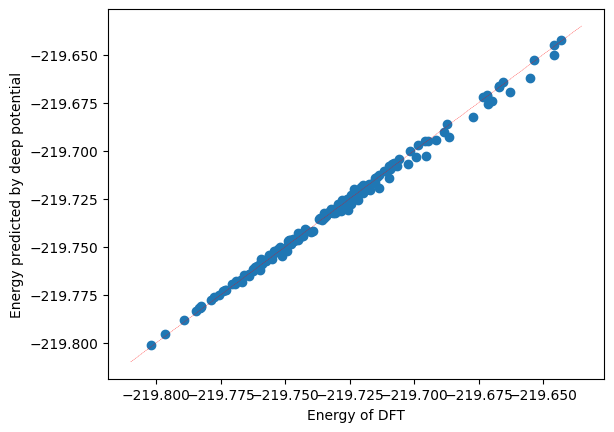

In [11]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(training_systems["energies"], predict["energies"])

x_range = np.linspace(plt.xlim()[0], plt.xlim()[1])

plt.plot(x_range, x_range, "r--", linewidth=0.25)
plt.xlabel("Energy of DFT")
plt.ylabel("Energy predicted by deep potential")
plt.plot()

In [12]:
! ls
! cd ./DeePMD-kit_Tutorial/02.lmp && cp ../01.train.finished/graph.pb ./ && tree -L 1

DeePMD-kit_Tutorial       README.md
LICENSE                   deepmd-kit_tutorial.ipynb
.
├── ch4.dump
├── conf.lmp
├── graph.pb
├── in.lammps
└── log.lammps

1 directory, 5 files


In [13]:
! cd ./DeePMD-kit_Tutorial/02.lmp && lmp -i in.lammps

LAMMPS (29 Aug 2024)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/comm.cpp:98)
  using 1 OpenMP thread(s) per MPI task
Loaded 1 plugins from /opt/anaconda3/envs/deepmd/lib/deepmd_lmp
Reading data file ...
  triclinic box = (0 0 0) to (10.114259 10.263124 10.216793) with tilt (0.036749877 0.13833062 -0.056322169)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  5 atoms
  read_data CPU = 0.005 seconds
DeePMD-kit WARNING: Environmental variable OMP_NUM_THREADS is not set. Tune OMP_NUM_THREADS for the best performance. See https://deepmd.rtfd.io/parallelism/ for more information.
Summary of lammps deepmd module ...
  >>> Info of deepmd-kit:
  installed to:       /opt/anaconda3/envs/deepmdDeePMD-kit WARNING: Environmental variable OMP_NUM_THREADS is not set. Tune OMP_NUM_THREADS for the best performance. See https://deepmd.rtfd.io/parallelism/ for more information.
2025-01-14 12:33:07.826566: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow 